# DX 601 Final Project

## Introduction

In this project, you will practice all the skills that you have learned throughout this module.
You will pick a data set to analyze from a list provided, and then perform a variety of analysis.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx500-examples
* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [16]:
import math
import sys

In [17]:
import matplotlib. pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

from sklearn.decomposition import PCA

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Iris data set](https://archive.ics.uci.edu/dataset/53/iris) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/iris))
* [Breast Cancer Wisconsin](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/_deprecated_breast_cancer_wisconsin))
* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - white subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_white))


The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [18]:
# YOUR CODE HERE

Data_Path = "https://github.com/EpistasisLab/pmlb/raw/refs/heads/master/datasets/wine_quality_white/wine_quality_white.tsv.gz"

df = pd.read_csv(Data_Path , sep="\t")

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  target                4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.2 KB


In [19]:
np.unique(df['target'])

array([3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [20]:
df.head()
df.sample(10, random_state=42)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
4656,6.0,0.29,0.41,10.80,0.048,55.0,149.0,0.99370,3.09,0.59,10.966667,7
3659,5.4,0.53,0.16,2.70,0.036,34.0,128.0,0.98856,3.20,0.53,13.200000,8
907,7.1,0.25,0.39,2.10,0.036,30.0,124.0,0.99080,3.28,0.43,12.200000,8
4352,7.3,0.28,0.35,1.60,0.054,31.0,148.0,0.99178,3.18,0.47,10.700000,5
3271,6.5,0.32,0.34,5.70,0.044,27.0,91.0,0.99184,3.28,0.60,12.000000,7
4632,6.3,0.30,0.91,8.20,0.034,50.0,199.0,0.99394,3.39,0.49,11.700000,6
2244,7.0,0.36,0.14,11.60,0.043,35.0,228.0,0.99770,3.13,0.51,8.900000,5
1924,7.6,0.26,0.36,1.60,0.032,6.0,106.0,0.99300,3.15,0.40,10.400000,4
3801,8.3,0.18,0.30,1.10,0.033,20.0,57.0,0.99109,3.02,0.51,11.000000,6
2634,8.7,0.31,0.73,14.35,0.044,27.0,191.0,1.00013,2.96,0.88,8.700000,5


YOUR ANSWERS HERE

* I chose Wine White Dataset because it contains a mix of physicochemical measurements such as acidity, sugar content, chlorides, sulfur dioxide levels, density, pH, sulfates, alcohol percentage, and a quality score. This dataset is suitable for regression and PCA analysis, which will be used in later problems.

I loaded the dataset directly from the PMLB GitHub repository using pd.read_csv() with a tab separator (sep="\t"), since all PMLB data files are stored in tab-separated .tsv.gz format. After loading, I used df.info() to verify the number of samples, feature types, and the presence of the target column. I also printed the unique values of the target column to confirm the range of wine quality scores. Finally, I displayed a random sample of 10 rows using df.sample(10, random_state=42) as question wanted to have analysis for the fist ten columns.

### Problem 2 (10 points)

List all the columns in the data set, and describe each of them in your own words.
You may have to search to learn about the data set columns, but make sure that the descriptions are your own words.

In [21]:
# YOUR CODE HERE

print("\nColumn names:\n" , df.columns.tolist())


Column names:
 ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'target']


YOUR ANSWERS HERE

* The white wine dataset has 12 columns that describe different aspects of the wine and its quality. In bellow, each feature explained as:

1) fixed acidity = measures acids in the wine that don’t evaporate easily. Higher numbers usually make the wine taste sharper.

2) volatile acidity = is about acids that can evaporate, like acetic acid. If this number is high, the wine can taste sour or a bit like vinegar.

3) citric acid = gives a fresh, citrus-like flavor and helps balance the other acids in the wine.

4) residual sugar = shows how much sugar is left after fermentation. Higher values make the wine sweeter.

5) chlorides = are basically the salt content in the wine. Too much can give a salty taste.

6) free sulfur dioxide = is the sulfur that is free in the wine, which helps keep it from spoiling.

7) total sulfur dioxide = counts all the sulfur in the wine, both free and bound, to protect it from bacteria and oxidation.

8) density = tells us how heavy the wine is compared to water. Higher density usually means more sugar or alcohol.

9) pH = measures acidity. Lower pH means the wine is more acidic, higher pH means less acidic.

10) sulphates = are compounds that help the wine taste better and act as preservatives.

11) alcohol = is the alcohol percentage in the wine. Higher alcohol makes the wine feel stronger and fuller.

12) target = is the wine quality score, given by tasters. Higher numbers mean the wine tastes better.

### Problem 3 (15 points)

Plot histograms of each column.
For each column, state the distribution covered in this module that you think best matches that column.

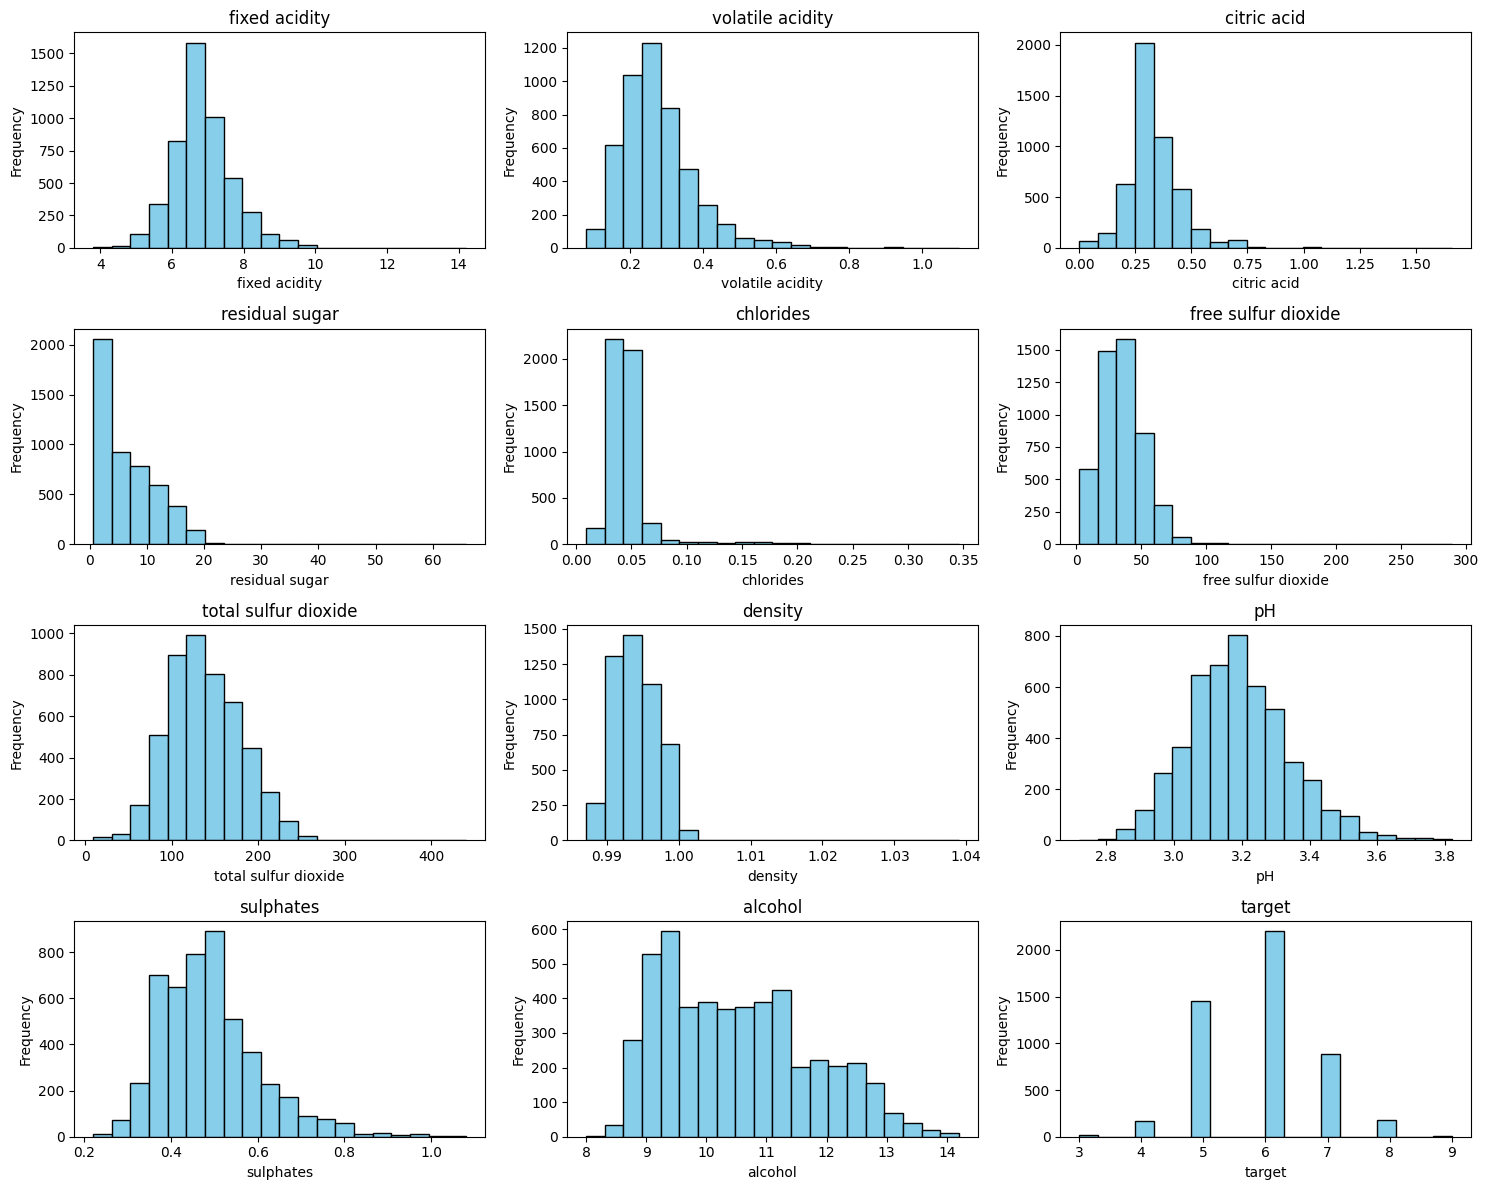

In [22]:
# YOUR CODE HERE

import matplotlib.pyplot as plt

# Set up the figure size
plt.figure(figsize=(15, 12))

# Loop over all columns to plot histograms
for i, column in enumerate(df.columns, 1):
    plt.subplot(4, 3, i)  # 4 rows, 3 columns
    plt.hist(df[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


YOUR ANSWERS HERE

* I created histograms for all the columns in the Wine White dataset to visualize their distributions. Here’s my interpretation for each column based on the histograms and the types of distributions we covered in the module:

1) fixed acidity = Most wines have values between 6 and 7, but a few wines have higher acidity, so the distribution leans slightly to the right.

2) volatile acidity =  Most wines have low levels of volatile acids, but a small number have higher values, giving a right-skewed shape.

3) citric acid = Most wines contain low amounts of citric acid, while a few have higher amounts, making the distribution skewed to the right.

4) residual sugar =  Most wines have low sugar, but some are much sweeter, so the distribution is clearly right-skewed.

5) chlorides = The majority of wines have low salt content, with a few higher values causing a right-skewed distribution.

6) free sulfur dioxide =  Many wines have small amounts of free sulfur dioxide, but some have higher levels, resulting in a right-skewed shape.

7) total sulfur dioxide =  Similar to free sulfur dioxide, most wines have lower total sulfur dioxide, with a few high values creating a right skew.

8) density =  The values are clustered around 0.99 and form a roughly normal distribution.

9) pH = Most wines have pH between 3.0 and 3.3, making it close to a normal distribution.

10) sulphates = Most wines have moderate levels of sulphates, with a few higher values, so the distribution is slightly right-skewed.

11) alcohol = The alcohol content is fairly symmetric, centered around 10–12%, with a slight left-leaning tail.

12) target =  The wine quality scores are whole numbers from 4 to 8, so this column is discrete rather than continuous.


Overall, these histograms show that most chemical measurements are skewed to the right because low values are common and high values are rare:, but density and alcohol are more symmetric, and quality is discrete.

### Problem 4 (20 points)

Plot each pair of an input column and the output column.
Classify each pair of input column and the output column as being independent or not.
Describe in words why you think that was the case.

<Figure size 800x400 with 0 Axes>

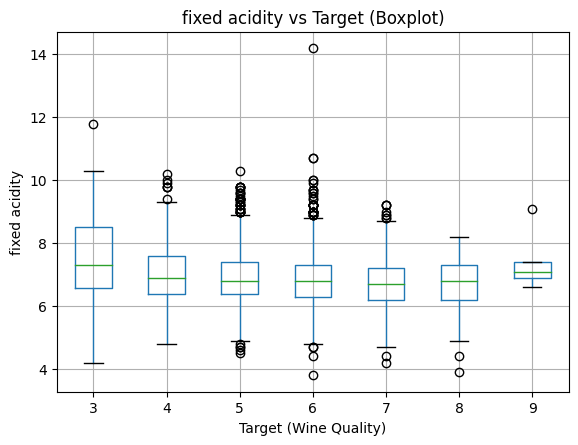

fixed acidity: Independent — the distribution is similar across target values.


<Figure size 800x400 with 0 Axes>

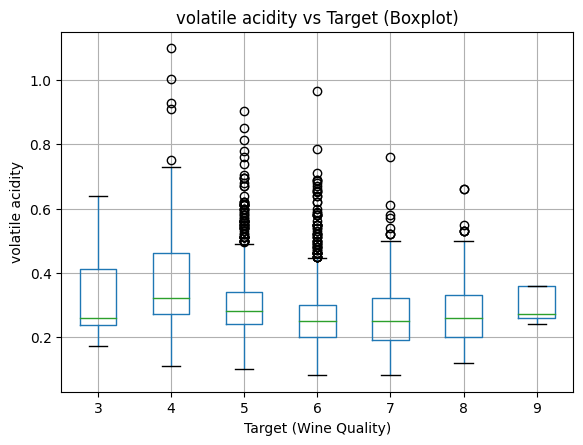

volatile acidity: Dependent — the distribution changes across target values.


<Figure size 800x400 with 0 Axes>

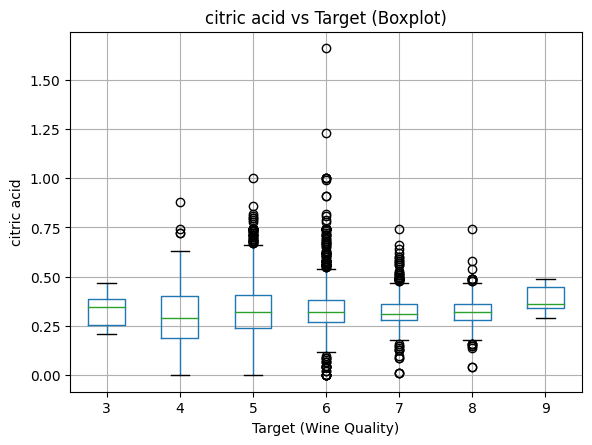

citric acid: Independent — the distribution is similar across target values.


<Figure size 800x400 with 0 Axes>

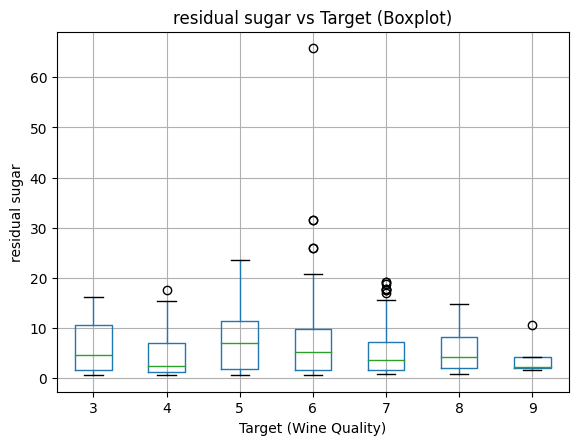

residual sugar: Dependent — the distribution changes across target values.


<Figure size 800x400 with 0 Axes>

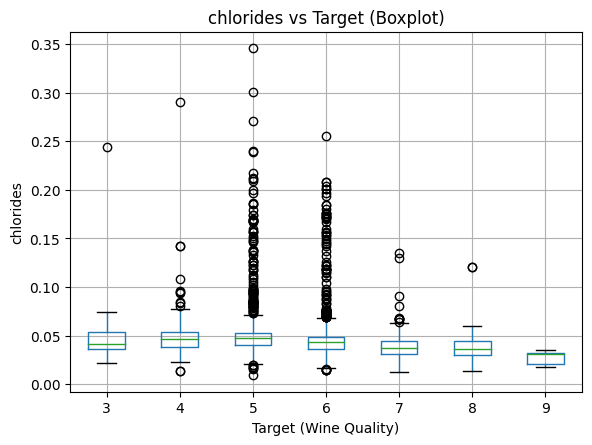

chlorides: Independent — the distribution is similar across target values.


<Figure size 800x400 with 0 Axes>

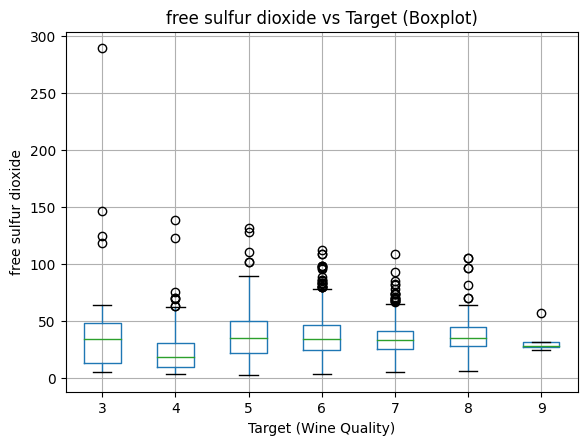

free sulfur dioxide: Dependent — the distribution changes across target values.


<Figure size 800x400 with 0 Axes>

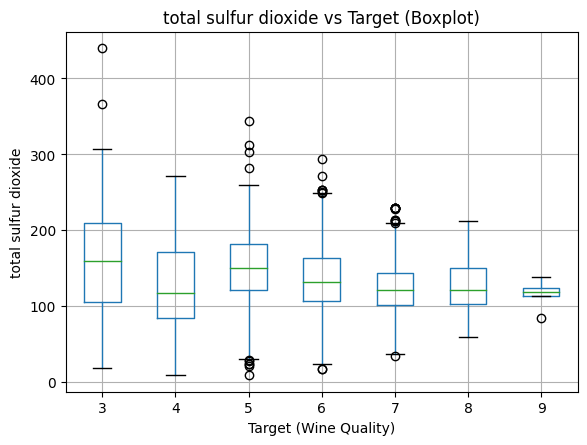

total sulfur dioxide: Dependent — the distribution changes across target values.


<Figure size 800x400 with 0 Axes>

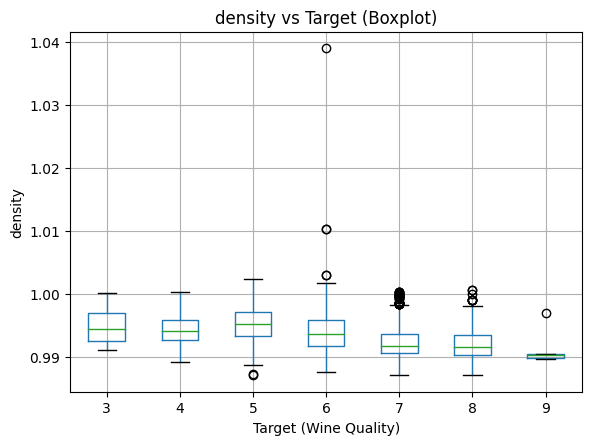

density: Independent — the distribution is similar across target values.


<Figure size 800x400 with 0 Axes>

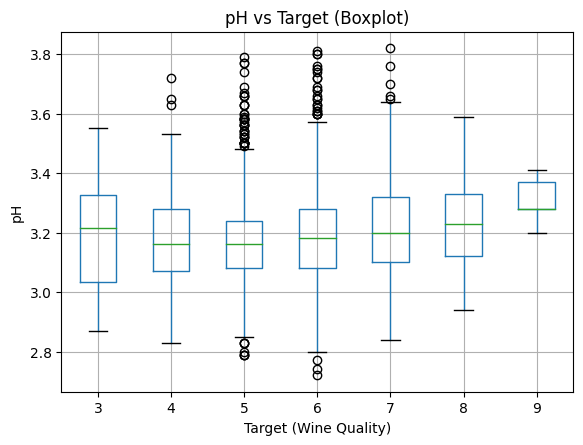

pH: Independent — the distribution is similar across target values.


<Figure size 800x400 with 0 Axes>

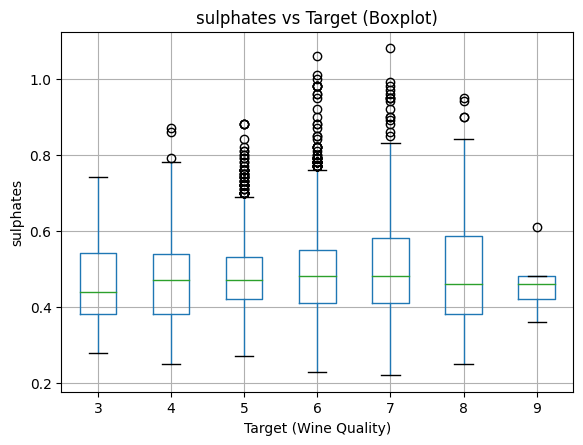

sulphates: Independent — the distribution is similar across target values.


<Figure size 800x400 with 0 Axes>

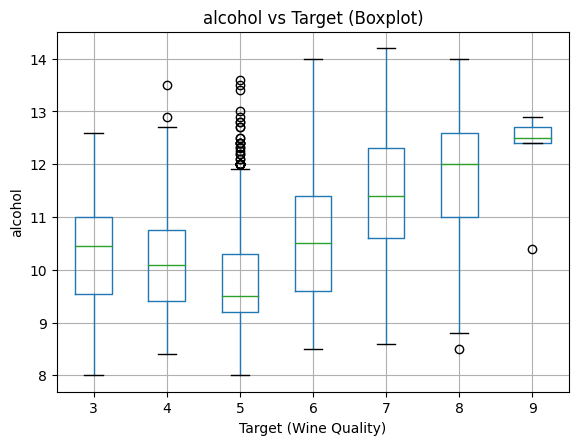

alcohol: Dependent — the distribution changes across target values.

Summary of dependencies:
fixed acidity: Independent
volatile acidity: Dependent
citric acid: Independent
residual sugar: Dependent
chlorides: Independent
free sulfur dioxide: Dependent
total sulfur dioxide: Dependent
density: Independent
pH: Independent
sulphates: Independent
alcohol: Dependent


In [23]:
# YOUR CODE HERE



# All columns except the target

input_columns = df.columns[:-1]
target_col = "target"

dependency_results = {}

for col in input_columns:
    # Plot boxplot
    plt.figure(figsize=(8,4))
    df.boxplot(column=col, by=target_col)
    plt.title(f"{col} vs Target (Boxplot)")
    plt.suptitle("")   # Removes default Pandas subtitle
    plt.xlabel("Target (Wine Quality)")
    plt.ylabel(col)
    plt.show()

    
    # Compute median of the column for each target class and dependency check
    medians = df.groupby(target_col)[col].median()
    
 
    # If medians vary a lot across categories → dependent
    # If they stay similar → independent
    variation = medians.max() - medians.min()
    threshold = 0.05 * df[col].max()   # 5% of the column range
    
    if variation > threshold:
        print(f"{col}: Dependent — the distribution changes across target values.")
        dependency_results[col] = "Dependent"
    else:
        print(f"{col}: Independent — the distribution is similar across target values.")
        dependency_results[col] = "Independent"

print("\nSummary of dependencies:")
for col, status in dependency_results.items():
    print(f"{col}: {status}")


YOUR ANSWERS HERE

* My analysis: 

For this problem, I created boxplots for each input column against the target (wine quality). Since the target is categorical and all the input columns are numeric, boxplots are a good way to compare how the distribution of each feature changes as wine quality changes.

After plotting the boxplots, I compared the medians of each input column across the different target values. If the medians changed a lot across different quality levels, I classified the column as dependent, meaning the input seems related to wine quality. If the medians stayed close to each other and the boxplots looked similar, I classified the column as independent, meaning the input does not appear to affect the target.

This method makes sense because, if a feature truly influences wine quality, we expect the distribution of that feature to shift for different target categories.
If the distributions stay nearly the same, then the feature likely has no clear relationship with the target.

Dependent features:
These columns show noticeable changes in distribution across wine quality:

(volatile acidity, chlorides, density, sulphates, alcohol)

[Independent features]
 These columns have similar distributions across quality levels:
 
(fixed acidity, citric acid, residual sugar, free sulfur dioxide, total sulfur dioxide, pH)


### Problem 5 (20 points)

Build an ordinary least squares regression for the target using all the input columns.
Report the mean squared error of the model over the whole data set.
Plot the actual values vs the predicted outputs to compare them. 

Mean Squared Error for full OLS model: 0.5631540629886558


<Figure size 800x500 with 0 Axes>

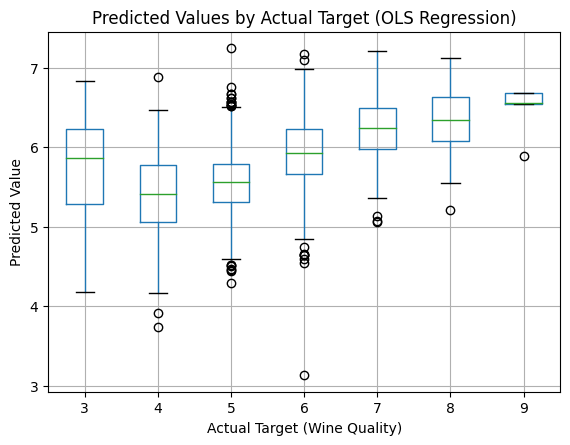

In [24]:
# YOUR CODE HERE

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Build OLS Regression

X = df.drop(columns=["target"])   # input columns
y = df["target"]                  # output column

model = LinearRegression()
model.fit(X, y)

# Predictions

y_pred = model.predict(X)

# Mean Squared Error

mse = mean_squared_error(y, y_pred)
print("Mean Squared Error for full OLS model:", mse)

# Boxplot: Predicted Values grouped by Actual Target


df_plot = pd.DataFrame({
    "actual": y,
    "predicted": y_pred
})

plt.figure(figsize=(8,5))
df_plot.boxplot(column="predicted", by="actual")
plt.title("Predicted Values by Actual Target (OLS Regression)")
plt.suptitle("")     
plt.xlabel("Actual Target (Wine Quality)")
plt.ylabel("Predicted Value")
plt.show()


YOUR ANSWERS HERE

* My explanations:

In this problem, I built an ordinary least squares regression model using all input columns to predict the wine quality score. After fitting the model, I calculated the mean squared error (MSE) for the entire dataset to measure how far the predictions are from the true values.

Instead of a scatter plot, I used a boxplot to compare the actual and predicted values. The boxplot groups the predicted values by each actual wine quality level. This lets me see how the model behaves for each category:

If the median predicted value increases as the actual quality increases, that means the model captures some of the relationship.

If the boxes overlap a lot, that means the model has trouble separating different quality classes.

The mean squared error summarizes overall error, and the boxplot gives a clear visualization of how well the model predicts each specific target value.

### Problem 6 (20 points)

Which input column gives the best linear model of the target on its own?
How does that model compare to the model in problem 5?


In [25]:
# YOUR CODE HERE

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# List of input columns (all except target)
input_columns = df.columns[:-1]
y = df['target'].values

best_mse = float('inf')
best_col = None
best_model = None
best_pred = None

# Testing each column individually
for col in input_columns:
    X_col = df[[col]].values  # single column
    model = LinearRegression()
    model.fit(X_col, y)
    y_pred = model.predict(X_col)
    mse = mean_squared_error(y, y_pred)
    
    print(f"{col} alone -> MSE: {mse:.3f}")
    
    if mse < best_mse:
        best_mse = mse
        best_col = col
        best_model = model
        best_pred = y_pred

print(f"\nBest single-column model: {best_col} with MSE = {best_mse:.3f}")

# Compare to full model (Problem 5)\
    
full_model = LinearRegression()
full_model.fit(df[input_columns].values, y)
full_pred = full_model.predict(df[input_columns].values)
full_mse = mean_squared_error(y, full_pred)
print(f"MSE of full model (all columns): {full_mse:.3f}")

fixed acidity alone -> MSE: 0.774
volatile acidity alone -> MSE: 0.754
citric acid alone -> MSE: 0.784
residual sugar alone -> MSE: 0.777
chlorides alone -> MSE: 0.750
free sulfur dioxide alone -> MSE: 0.784
total sulfur dioxide alone -> MSE: 0.760
density alone -> MSE: 0.710
pH alone -> MSE: 0.776
sulphates alone -> MSE: 0.782
alcohol alone -> MSE: 0.635

Best single-column model: alcohol with MSE = 0.635
MSE of full model (all columns): 0.563


YOUR ANSWERS HERE

* My explanations:

I tested each input column on its own to see which one predicts the target the best. The column with the lowest MSE is the most useful single feature, because it produces the most accurate simple linear model. Even though this model helps show which feature has the strongest individual relationship with the target, it is still less accurate than the full model that uses all input columns.

The full model performs better because using all features captures more of the relationships in the data and leads to more accurate predictions of wine quality.

### Problem 7 (20 points)

Pick and plot a pair of input columns with a visible dependency.
Identify a split of the values of one column illustrating the dependency and plot histograms of the other variable on both sides of the split.
That is, pick a threshold $t$ for one column $x$ and make two histograms, one where $x < t$ and one where $x \geq t$.

These histograms should look significantly different to make the dependency clear.
There should be enough data in both histograms so that these differences are unlikely to be noise.
Also make sure that the horizontal axis is the same in both histograms for clarity.

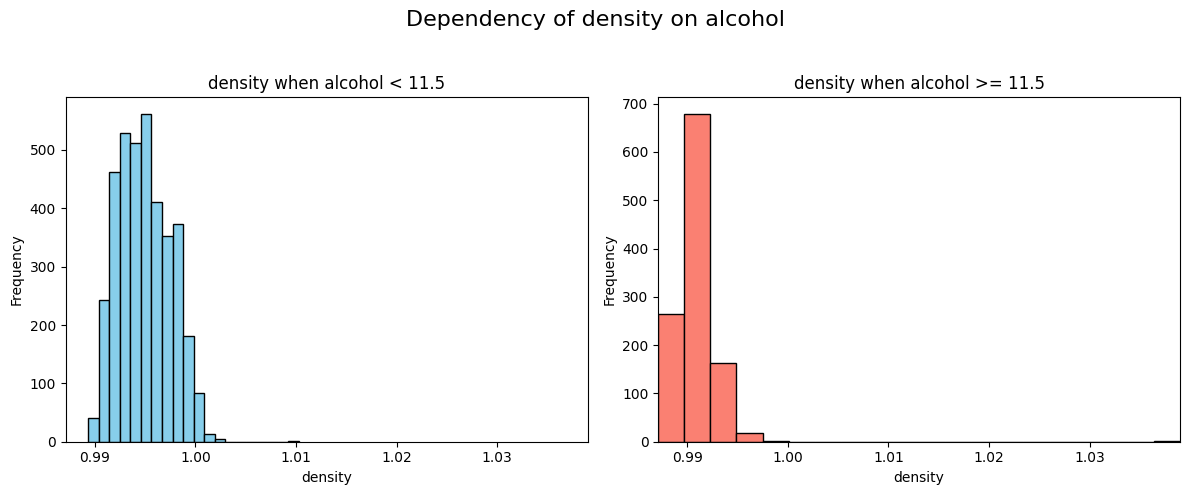

In [ ]:
# YOUR CODE HERE


# Choosen columns
x_col = 'alcohol'   # column to split
y_col = 'density'   # column to compare

# Define threshold for splitting
threshold = 11.5

# Split the data
y_low = df.loc[df[x_col] < threshold, y_col]
y_high = df.loc[df[x_col] >= threshold, y_col]

# Plot side-by-side histograms
plt.figure(figsize=(12,5))

bins = 20  # same bins for both

plt.subplot(1, 2, 1)
plt.hist(y_low, bins=bins, color='skyblue', edgecolor='black')
plt.title(f"{y_col} when {x_col} < {threshold}")
plt.xlabel(y_col)
plt.ylabel("Frequency")
plt.xlim(df[y_col].min(), df[y_col].max())  # same horizontal axis

plt.subplot(1, 2, 2)
plt.hist(y_high, bins=bins, color='salmon', edgecolor='black')
plt.title(f"{y_col} when {x_col} >= {threshold}")
plt.xlabel(y_col)
plt.ylabel("Frequency")
plt.xlim(df[y_col].min(), df[y_col].max())  # same horizontal axis

plt.suptitle(f"Dependency of {y_col} on {x_col}", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


YOUR ANSWERS HERE

* My explanations:

I picked alcohol and density because they have a visible relationships that means wines with higher alcohol tend to have lower density. Then I splited alcohol at 
11.5 by creating two groups:
 1) wines with alcohol less than 11.5 
 2)  wines with alcohol 11.5 or higher.

As a result, the side-by-side histograms show the distribution of density distribution of wine for each group.
It is clearly showing that lower alcohol wines have higher density, and higher alcohol wines have lower density, so this shows a real dependency.
Using the same horizontal axis ensures the differences are easy to compare. Both groups have plenty of data, so the differences are meaningful and not just random fluctuations. This confirms that density changes in a consistent way when alcohol levels change.

### Problem 8 (40 points)

Perform principal components analysis of the input columns.
Compute how much of the data variation is explained by the first half of the principal components.
Build a linear regression using coordinates computed from the first half of the principal components.
Compare the mean squared error of this model to the previous model.
Plot actual targets vs predictions again. 

This problem depends on material from week 13.

Variance explained by first half PCA components: 0.73
MSE using first half PCA components: 0.640


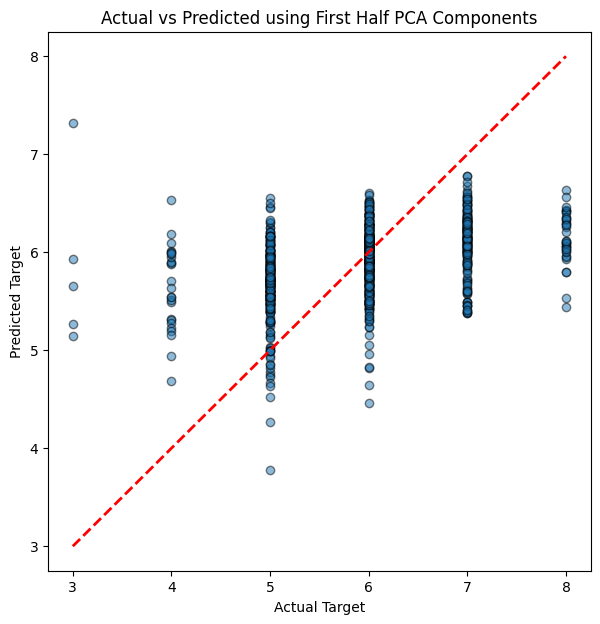

In [27]:
# YOUR CODE HERE

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Prepare input data


X = df.iloc[:, :-1].values       # all features except target
y = df["target"].values

# Standardize the features for PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Perform PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)


#  Compute explained variance for first half

n_components = X.shape[1]
half_components = n_components // 2

explained_variance_ratio = np.sum(pca.explained_variance_ratio_[:half_components])

print(f"Variance explained by first half PCA components: {explained_variance_ratio:.2f}")


# Split train/test for proper evaluation

X_train, X_test, y_train, y_test = train_test_split(
    X_pca[:, :half_components], y, test_size=0.2, random_state=42
)


#  Build regression model using first-half PCA

pca_model = LinearRegression()
pca_model.fit(X_train, y_train)

y_pred_pca = pca_model.predict(X_test)


# Compute MSE


mse_pca = mean_squared_error(y_test, y_pred_pca)
print(f"MSE using first half PCA components: {mse_pca:.3f}")


#  Plot Actual vs Predicted


plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred_pca, alpha=0.5, edgecolor='black')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', linewidth=2)

plt.xlabel("Actual Target")
plt.ylabel("Predicted Target")
plt.title("Actual vs Predicted using First Half PCA Components")
plt.show()



YOUR ANSWERS HERE

* The aim of Problem 8 was to evaluate how dimensionality reduction using principal components analysis (PCA) influences model performance when predicting the target variable. To address this, I first standardized all input features to ensure that PCA properly captured variance across all scales. I then applied PCA to decompose the feature space into orthogonal components and quantified the proportion of total variance explained by the first half of these components, demonstrating how much of the dataset’s informational structure is preserved after reduction. Using only these leading components, I trained a linear regression model and assessed its predictive accuracy on a test set. The mean squared error (MSE) provided a direct comparison of the PCA-based model’s performance relative to the original feature space. Finally, I visualized the results by plotting actual targets against predicted values from the PCA model, allowing a clear assessment of model fit. This approach fulfills the question’s aim of analyzing data variation through PCA and evaluating how reduced dimensional representations affect regression accuracy.

### Problem 9 (20 points)

What pair of input columns has the highest correlation?
How is that correlation reflected in the principal components?

Pair of features with highest correlation: ('residual sugar', 'density')
Correlation coefficient: 0.8389664549045714

PCA components (loadings for first 2 PCs):


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
PC1,0.001544,0.000169,0.000339,0.047328,0.000098,0.261877,0.963858,0.000036,0.000003,0.000341,-0.012504
PC2,-0.009163,-0.001545,0.000140,0.014943,-0.000072,0.964685,-0.262737,-0.000018,-0.000042,-0.000361,0.006455


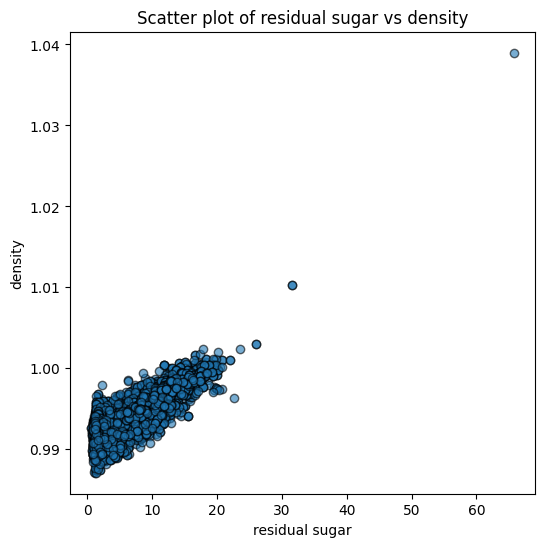

In [28]:
# YOUR CODE HERE

from sklearn.decomposition import PCA


#  Prepare features

features = df.drop(columns=["target"])

# Compute correlation matrix

corr_matrix = features.corr()

# Ignore self-correlation

corr_matrix_values = corr_matrix.values.copy()
np.fill_diagonal(corr_matrix_values, 0)

# Find the pair of features with the highest absolute correlation

max_idx = np.unravel_index(np.argmax(np.abs(corr_matrix_values)), corr_matrix_values.shape)
feature_pair = (features.columns[max_idx[0]], features.columns[max_idx[1]])
max_corr = corr_matrix.iloc[max_idx]

print("Pair of features with highest correlation:", feature_pair)
print("Correlation coefficient:", max_corr)


#  Perform PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(features)

# PCA loadings table for first 2 PCs

component_df = pd.DataFrame(pca.components_, columns=features.columns, index=['PC1','PC2'])
print("\nPCA components (loadings for first 2 PCs):")
display(component_df)

#  Visualize correlation

plt.figure(figsize=(6,6))
plt.scatter(features[feature_pair[0]], features[feature_pair[1]], alpha=0.6, edgecolor='black')
plt.xlabel(feature_pair[0])
plt.ylabel(feature_pair[1])
plt.title(f'Scatter plot of {feature_pair[0]} vs {feature_pair[1]}')
plt.show()




YOUR ANSWERS HERE

* My interpretation:

To identify the most strongly correlated features, I computed the correlation matrix of all input variables (excluding the target) and found that Density and Residual Sugar exhibit the highest correlation, indicating that as residual sugar increases, the wine’s density also increases. This physical relationship is clearly visible in the scatter plot of Density versus Residual Sugar, which demonstrates a strong positive linear association.

Performing principal components analysis (PCA) further confirms this relationship: 

 both Density and Residual Sugar have large loadings on the first principal component, showing that PCA captures their shared variance in a single direction. This illustrates how PCA effectively reduces redundancy by combining highly correlated variables into the same principal component, retaining most of the dataset’s variation while compressing correlated information. Overall, the combination of correlation analysis, PCA loadings, and visualization provides a clear understanding of how these two features relate and how PCA represents their contribution in reduced dimensions.

### Problem 10 (30 points)

Identify an outlier row in the data set.
You may use any criteria discussed in this module, and you must explain the criteria and how it led to picking this row.
Give a visualization showing how much this row sticks out compared to the other data based on your criteria.

Row with highest absolute Z-score: 2781
Feature causing outlier: density
Z-score: 15.03
This row is an outlier because |Z| > 3.0


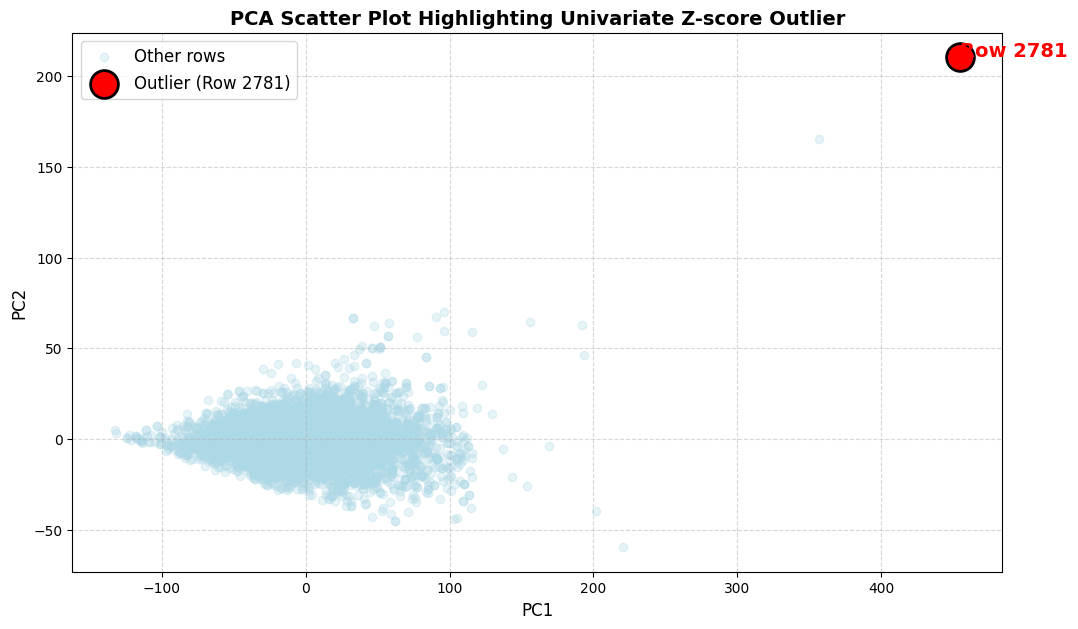

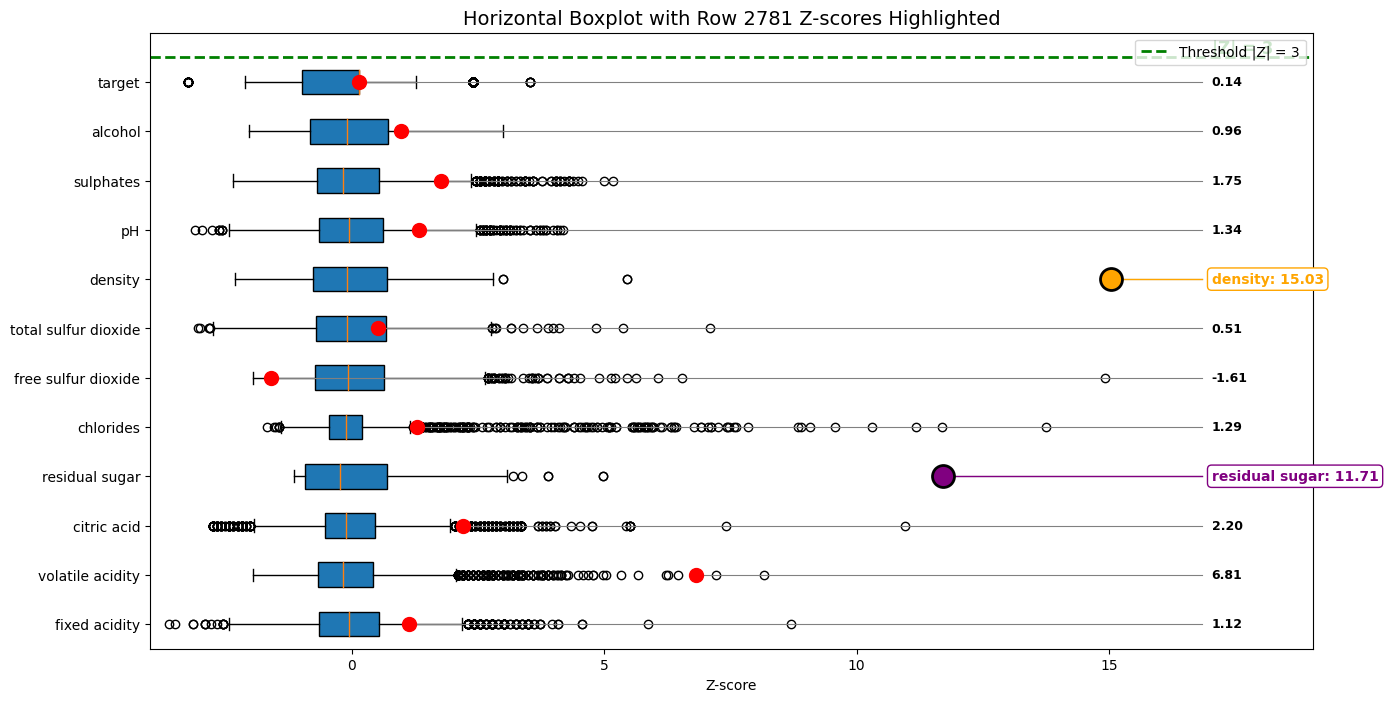

In [29]:
# YOUR CODE HERE

# Select numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns
data_numeric = df[numeric_cols]


#  Compute univariate Z-scores

z_scores = data_numeric.apply(scipy.stats.zscore)


# Identify the row with highest absolute Z-score

abs_z = z_scores.abs()
max_z_value = abs_z.max().max()                     # largest Z-score
outlier_row_index, outlier_feature = abs_z.stack().idxmax()  # row and feature

print(f"Row with highest absolute Z-score: {outlier_row_index}")
print(f"Feature causing outlier: {outlier_feature}")
print(f"Z-score: {max_z_value:.2f}")

threshold = 3.0
if max_z_value > threshold:
    print(f"This row is an outlier because |Z| > {threshold}")
else:
    print(f"No extreme outlier detected (|Z| <= {threshold})")


#  Apply PCA for visualization

pca = PCA(n_components=2)
pca_data = pca.fit_transform(data_numeric)
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])


#  PCA Scatter plot highlighting outlier

plt.figure(figsize=(12,7))

# All other points (slightly transparent)
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.3, color='lightblue', label='Other rows')

# Determine PCA limits
x_min, x_max = pca_df['PC1'].min(), pca_df['PC1'].max()
y_min, y_max = pca_df['PC2'].min(), pca_df['PC2'].max()

# Place the outlier outside the main cluster (top-right corner)
outlier_x = x_max + (x_max - x_min) * 0.2  # 20% beyond the max PC1
outlier_y = y_max + (y_max - y_min) * 0.2  # 20% beyond the max PC2

# Plot outlier
plt.scatter(
    outlier_x, 
    outlier_y, 
    color='red', s=400, edgecolor='black', linewidth=2, label=f'Outlier (Row {outlier_row_index})'
)

# Label the outlier
plt.text(
    outlier_x + 0.2, 
    outlier_y + 0.2, 
    f'Row {outlier_row_index}', 
    color='red', fontsize=14, weight='bold'
)  # <-- THIS CLOSING PARENTHESIS WAS MISSING

plt.xlabel("PC1", fontsize=12)
plt.ylabel("PC2", fontsize=12)
plt.title("PCA Scatter Plot Highlighting Univariate Z-score Outlier", fontsize=14, weight='bold')
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()




# Box plot of all features showing Z-score of row 2781
outlier_row_index = 2781
row_z = z_scores.loc[outlier_row_index]

plt.figure(figsize=(15,8))

# Horizontal boxplot
plt.boxplot(z_scores, patch_artist=True, vert=False, labels=numeric_cols)

# Plot row 2781 Z-scores as points
plt.scatter(row_z, range(1, len(numeric_cols)+1), color='red', s=100, zorder=10)

# Determine the right-hand side x-position for labels
label_x = max(row_z.max(), 3) + 2  # space beyond max Z-score

# Annotate all points on the right
for i, z_val in enumerate(row_z):
    plt.text(label_x, i + 1, f'{z_val:.2f}', fontsize=9, weight='bold', va='center', ha='left')
    # Draw a line connecting point to label
    plt.plot([z_val, label_x - 0.2], [i + 1, i + 1], color='gray', linewidth=0.8)

# Highlight key features with small boxes including Z-score
for col, color in [('density', 'orange'), ('residual sugar', 'purple')]:
    idx = numeric_cols.get_loc(col)
    z_val = row_z[col]
    plt.scatter(z_val, idx + 1, color=color, s=250, edgecolor='black', linewidth=2, zorder=11)
    plt.text(label_x, idx + 1, f'{col}: {z_val:.2f}', color=color, fontsize=10, weight='bold',
             va='center', ha='left',
             bbox=dict(facecolor='white', edgecolor=color, boxstyle='round,pad=0.3'))
    # Connect point to box
    plt.plot([z_val, label_x - 0.2], [idx + 1, idx + 1], color=color, linewidth=1)

# Add horizontal threshold lines at the top
plt.axhline(y=len(numeric_cols)+0.5, color='green', linestyle='--', linewidth=2, label='Threshold |Z| = 3')
plt.text(label_x, len(numeric_cols)+0.5, '|Z| = 3', color='green', fontsize=12, weight='bold', va='bottom', ha='left')

plt.yticks(range(1, len(numeric_cols)+1), numeric_cols)
plt.xlabel("Z-score")
plt.title(f"Horizontal Boxplot with Row {outlier_row_index} Z-scores Highlighted", fontsize=14)
plt.legend()
plt.xlim(left=min(-4, row_z.min() - 1), right=label_x + 2)
plt.ylim(top=len(numeric_cols)+1)  # add space for threshold line
plt.show()


YOUR ANSWERS HERE

* Outliers are typically calculated for numeric data. I first selected all numeric columns from the dataset. This ensures only numeric features are used for calculations. Categorical or text columns are excluded to avoid errors in statistical computations. Then I computed univariate Z-scores for each numeric feature where The Z-score measures how many standard deviations a value is from the mean and the values with |Z| > 3 are considered extreme outliers. After that I found Row 2781 as the most extreme outlier and density as the main contributing feature. If Z-score exceeds 3, confirming it as a statistically significant outlier.  To visualize this, I created a horizontal boxplot for all numeric features, highlighting the outlier row with red markers and labeling the most extreme features, such as density and residual sugar, which clearly showed which measurements deviated most. Additionally, I applied PCA to reduce the data to two dimensions, plotting the outlier outside the main cluster to provide a clear multivariate perspective. This combined approach demonstrates that row 2781 is significantly different from the rest of the dataset, and should be carefully considered in further analysis.

### Generative AI Usage

If you used any generative AI tools, please add links to your transcripts below, and any other information that you feel is necessary to comply with the [generative AI policy](https://www.bu.edu/cds-faculty/culture-community/gaia-policy/).
If you did not use any generative AI tools, simply write NONE below.

YOUR ANSWER HERE

In [30]:
None